In [1]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

In [2]:
data = pd.read_csv("creditcard.csv")
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [3]:
print(data.shape)
print(data.describe())

(130802, 31)
                Time             V1             V2             V3  \
count  130802.000000  130802.000000  130802.000000  130802.000000   
mean    49788.355690      -0.245796       0.001574       0.676860   
std     20019.335232       1.823485       1.619337       1.276232   
min         0.000000     -56.407510     -72.715728     -33.680984   
25%     36926.250000      -1.016281      -0.575183       0.173437   
50%     51566.000000      -0.258119       0.093828       0.752911   
75%     66518.000000       1.158111       0.762659       1.367887   
max     79435.000000       1.960497      18.902453       9.382558   

                  V4             V5             V6             V7  \
count  130802.000000  130802.000000  130802.000000  130802.000000   
mean        0.144168      -0.285630       0.080685      -0.117838   
std         1.328394       1.314929       1.284704       1.173648   
min        -5.172595     -42.147898     -26.160506     -31.764946   
25%        -0.714826

In [4]:
# Determine number of fraud cases in dataset
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.001999387161023441
Fraud Cases: 261
Valid Transactions: 130540


Most of the transactions are valid.

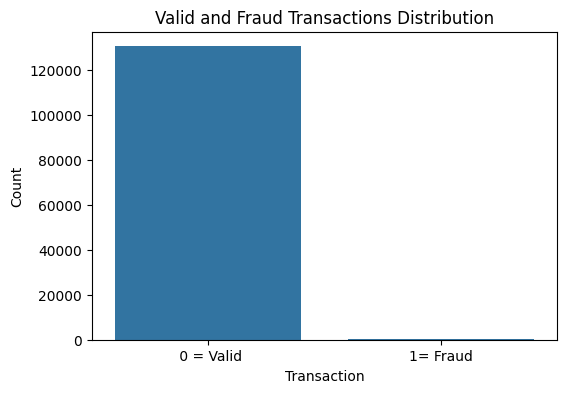

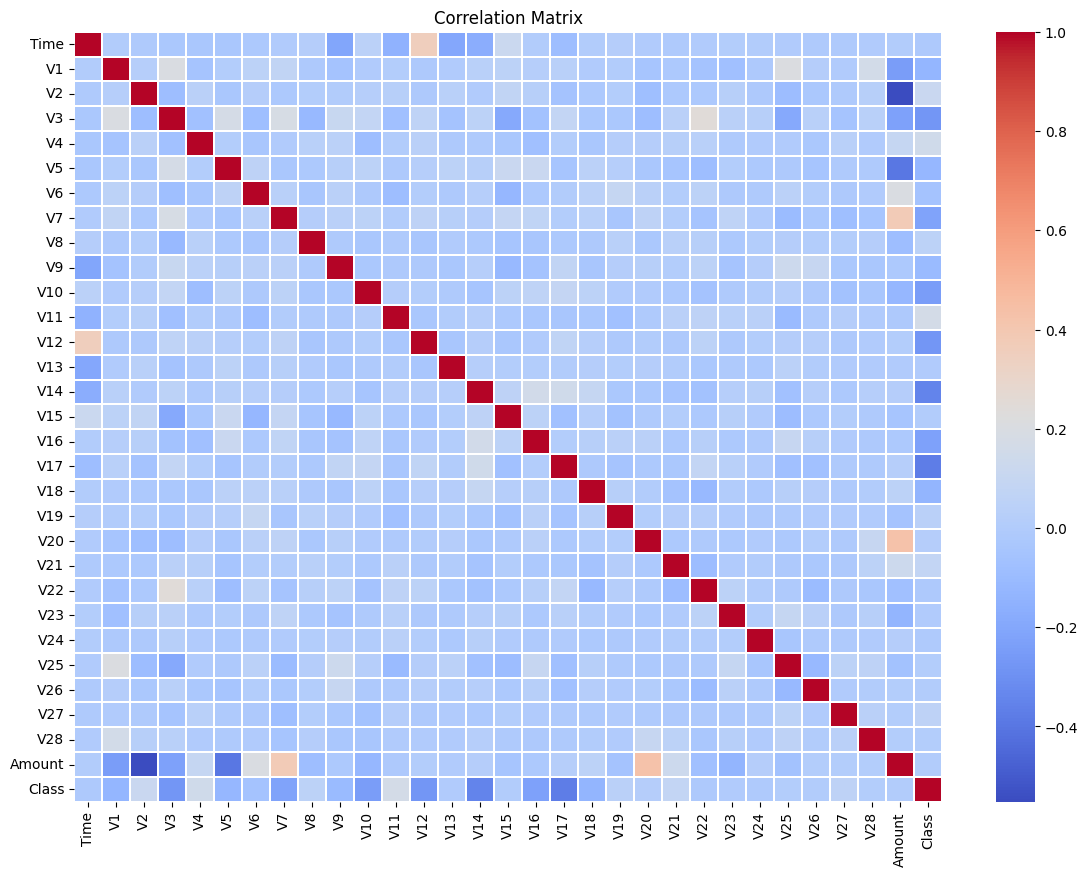

In [5]:
# Bar plot for the count of fraud vs valid transactions
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=data)
plt.title('Valid and Fraud Transactions Distribution')
plt.xlabel('Transaction')
plt.ylabel('Count')
plt.xticks([0, 1], [' 0 = Valid', '1= Fraud'])
plt.show()

# Correlation heatmap to visualize the relationship between the features
plt.figure(figsize=(14, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.2)
plt.title('Correlation Matrix')
plt.show()

Most of the features are not correlated with each other. V2 and V5 are negatively correlated with Amount. v7 and v20 are positively correlated with amount

In [6]:
print("Amount details of the fraudulent transaction")
fraud.Amount.describe()

Amount details of the fraudulent transaction


,Amount
count,261.000000
mean,116.679693
std,246.300626
min,0.000000
25%,1.000000
50%,11.380000
75%,99.990000
max,1809.680000


In [7]:
print("details of valid transaction")
valid.Amount.describe()

details of valid transaction


,Amount
count,130540.000000
mean,92.443479
std,250.815557
min,0.000000
25%,6.240000
50%,24.560000
75%,82.500000
max,19656.530000


In [8]:
# dividing the X and the Y from the dataset
X = data.drop(['Class'], axis = 1)
Y = data["Class"]
print(X.shape)
print(Y.shape)
# getting just the values for the sake of processing
# (its a numpy array with no columns)
xData = X.values
yData = Y.values

(130802, 30)
(130802,)


In [10]:
import numpy as np

print("Number of NaN values in yTrain:", np.isnan(yTrain).sum())

Number of NaN values in yTrain: 1


In [12]:
from sklearn.impute import SimpleImputer

# Create an imputer that fills NaN with the most frequent value (mode)
imputer = SimpleImputer(strategy='most_frequent')

# Reshape yData since it’s a 1D array
yData_reshaped = yData.reshape(-1, 1)

# Fit the imputer and transform yData
yData_imputed = imputer.fit_transform(yData_reshaped).ravel()

# Now you can proceed to split the data
xTrain, xTest, yTrain, yTest = train_test_split(
    xData, yData_imputed, test_size=0.2, random_state=42)


In [13]:
# Building the Random Forest Classifier (RANDOM FOREST)
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)
# predictions
yPred = rfc.predict(xTest)

The model used is Random Forest classifier
The accuracy is 0.9994648522609992
The precision is 1.0
The recall is 0.7846153846153846
The F1-Score is 0.8793103448275862
The Matthews correlation coefficient is0.8855476719608734


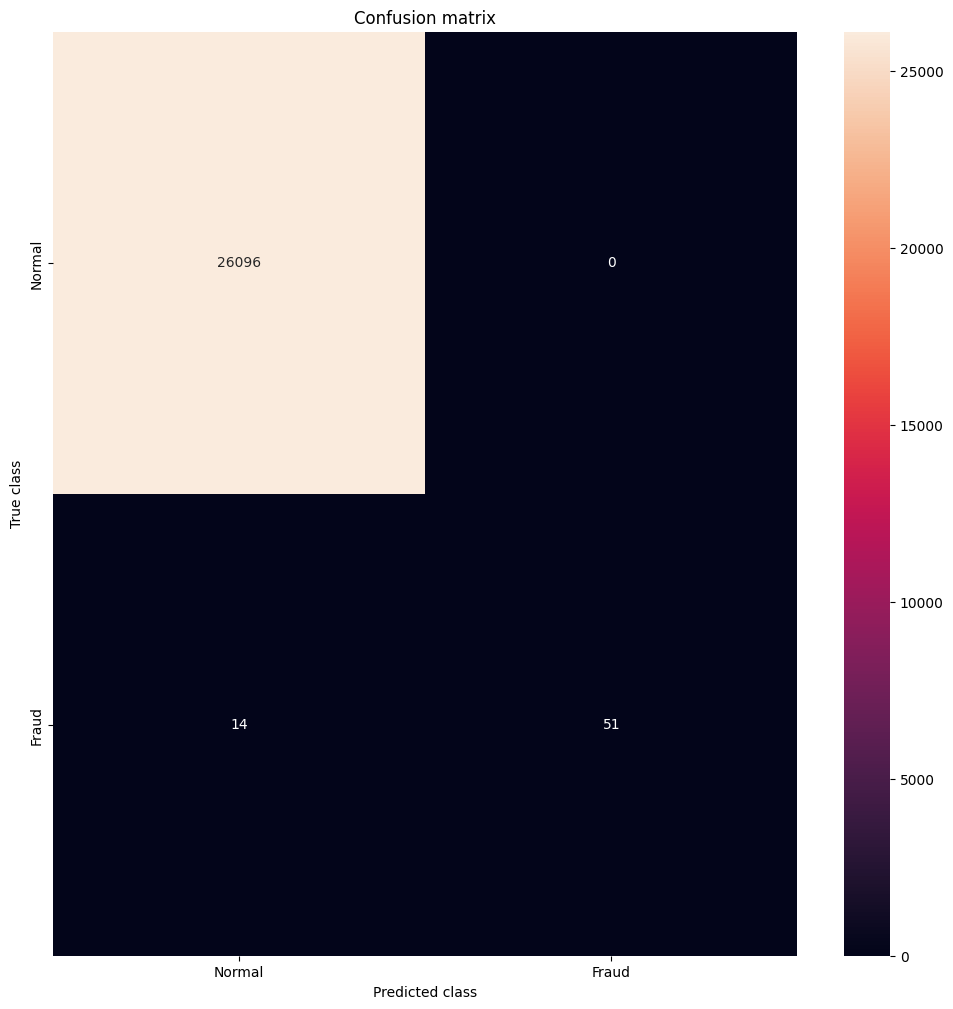

In [14]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

n_outliers = len(fraud)
n_errors = (yPred != yTest).sum()
print("The model used is Random Forest classifier")

acc = accuracy_score(yTest, yPred)
print("The accuracy is {}".format(acc))

prec = precision_score(yTest, yPred)
print("The precision is {}".format(prec))

rec = recall_score(yTest, yPred)
print("The recall is {}".format(rec))

f1 = f1_score(yTest, yPred)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(yTest, yPred)
print("The Matthews correlation coefficient is{}".format(MCC))



# printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [15]:
print(conf_matrix)

[[26096     0]
 [   14    51]]
